## Plot all the forecast results for comparison

In [180]:
import pandas as pd
from matplotlib import pyplot as plt
import random
from sklearn.metrics import mean_squared_error
from math import sqrt

In [181]:
pd.set_option('display.max_columns', None)

In [182]:
PATH='../input/merged_data/'

In [183]:
#original data - read in, keep the last month to compare forecasts

In [184]:
df = pd.read_csv('{0}hh_final_544_ids_735_days.csv'.format(PATH), low_memory=False)

In [185]:
df.rename(columns={'index': 'day_time'}, inplace=True)

In [186]:
df['day_time'] = pd.to_datetime(df['day_time'], format='%Y-%m-%d %H:%M:%S')

In [187]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [188]:
df.head(n=2)

,day_time,LCLid,energy(kWh/hh),dayYear,dayMonth,dayWeek,dayDay,dayDayofweek,dayDayofyear,dayIs_month_end,dayIs_month_start,dayIs_quarter_end,dayIs_quarter_start,dayIs_year_end,dayIs_year_start,dayElapsed,delta_minutes,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,humidity,summary,is_bank_holiday,bank_holiday,day,cloudCover,uvIndex,moonPhase,from_sunrise,to_sunset,Afteris_bank_holiday,Beforeis_bank_holiday,stdorToU,Acorn,Acorn_grouped
0,2012-02-05,MAC000006,0.042,2012,2,5,5,6,36,False,False,False,False,False,False,1328400000,-360000,1.32,160.0,-0.12,-0.22,1024.21,-4.68,4.35,snow,0.99,Foggy,False,NaN,2012-02-05,0.85,1.0,0.42,454.0,-1017.0,0,-87840,Std,ACORN-Q,Adversity
1,2012-02-05,MAC005178,0.561,2012,2,5,5,6,36,False,False,False,False,False,False,1328400000,-360000,1.32,160.0,-0.12,-0.22,1024.21,-4.68,4.35,snow,0.99,Foggy,False,NaN,2012-02-05,0.85,1.0,0.42,454.0,-1017.0,0,-87840,Std,ACORN-E,Affluent


In [189]:
#clip the data to here for plots
clip_date = pd.datetime(2014,1,12)
val_date = pd.datetime(2014,1,26)
#test data - last week of data
test_date = pd.datetime(2014,2,2)
#end date-not inclusive of
end_date = pd.datetime(2014,2,9)

In [190]:
#keep last 2 weeks of the original dataset
#use for plots
plot_df = df.loc[df['day_time'] >= val_date]

In [191]:
plot_df.sort_values(by=['LCLid', 'day_time'], inplace=True)

/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [192]:
#create a new df with rmse calcs for all steps
df_rmse = df.loc[df['day_time'] >= test_date]

In [193]:
df_rmse.sort_values(by=['LCLid', 'day_time'], inplace=True)

/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Keep only necessary columns

In [194]:
df_rmse = df_rmse[['LCLid', 'day_time', 'energy(kWh/hh)']]

replace any NaN

In [195]:
df_rmse['energy(kWh/hh)'].fillna(0, inplace=True)

In [196]:
df_rmse = df_rmse.reset_index(drop=True)

Read in predictions

In [197]:
pytorch_mim_df = pd.read_csv('{0}tmp/4_6_d_forecast_NN_hh_preds.csv'.format(PATH))

In [198]:
pytorch_mim_df['day_time'] = pd.to_datetime(pytorch_mim_df['day_time'], format='%Y-%m-%d %H:%M:%S')

In [199]:
pytorch_mim_df.sort_values(by=['LCLid', 'day_time'], inplace=True)

In [200]:
pytorch_mim_df = pytorch_mim_df.reset_index(drop=True)

In [201]:
pytorch_mim_df.head(n=2)

,day_time,LCLid,energy(kWh/hh)
0,2014-02-02 00:00:00,MAC000006,0.286783
1,2014-02-02 00:30:00,MAC000006,0.267537


In [202]:
actual = df_rmse['energy(kWh/hh)']
y_pred = pytorch_mim_df['energy(kWh/hh)']

In [242]:
len(actual), len(y_pred)

(182784, 182784)

In [243]:
abs_list=[]
for a, y in zip(actual, y_pred):
    abs_diff = abs(a-y)
    abs_list.append(abs_diff)

In [244]:
df_rmse['abs_diff'] = abs_list

In [207]:
df_rmse['y_pred'] = y_pred

In [246]:
df_rmse.head()

,LCLid,day_time,energy(kWh/hh),y_pred,abs_diff
0,MAC000006,2014-02-02 00:00:00,0.020,0.286783,0.266783
1,MAC000006,2014-02-02 00:30:00,0.048,0.267537,0.219537
2,MAC000006,2014-02-02 01:00:00,0.014,0.253111,0.239111
3,MAC000006,2014-02-02 01:30:00,0.035,0.238577,0.203577
4,MAC000006,2014-02-02 02:00:00,0.033,0.225506,0.192506


In [247]:
#save 
df_rmse.to_csv('{0}tmp/4_6_d_forecast_NN_hh_actual_and_preds.csv'.format(PATH))

In [256]:
df_rmse = df_rmse.set_index('day_time')

get list of LCLid's'

In [211]:
lclids = df['LCLid'].unique()

In [212]:
mac = random.choice(lclids)
mac

'MAC000088'

In [26]:
#get an example LCLid

In [261]:
def plot_mac(df, mac):
    mac_df = df.loc[df['LCLid'] == mac]
    ts = mac_df['energy(kWh/hh)']
    ys = mac_df['y_pred']
    plt.figure(figsize=(18,6))
    plt.plot(ts)
    plt.plot(ys)
    plt.legend(['Forecast','Actual'])
    plt.title(mac)
    plt.show()
    

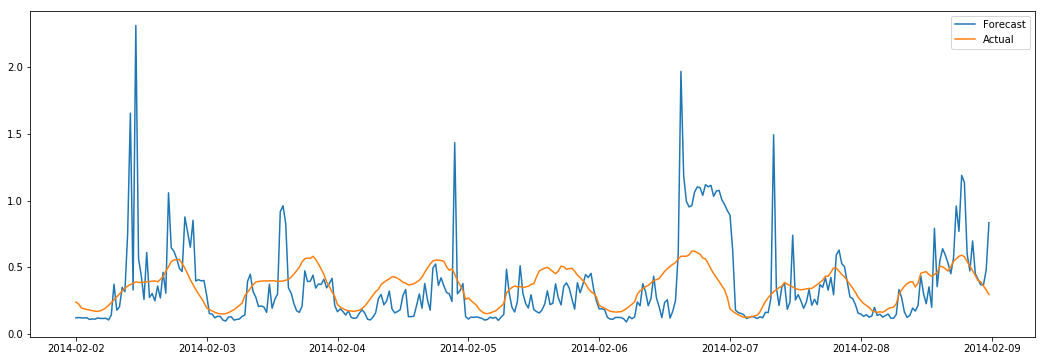

In [219]:
plot_mac(df_rmse, mac)

Plot the MAC's used in ML forecasts

In [220]:
mac = 'MAC000230'

In [223]:
mac_df = df_rmse.loc[df_rmse['LCLid'] == mac]

In [224]:
ts = mac_df['energy(kWh/hh)']
ys = mac_df['y_pred']

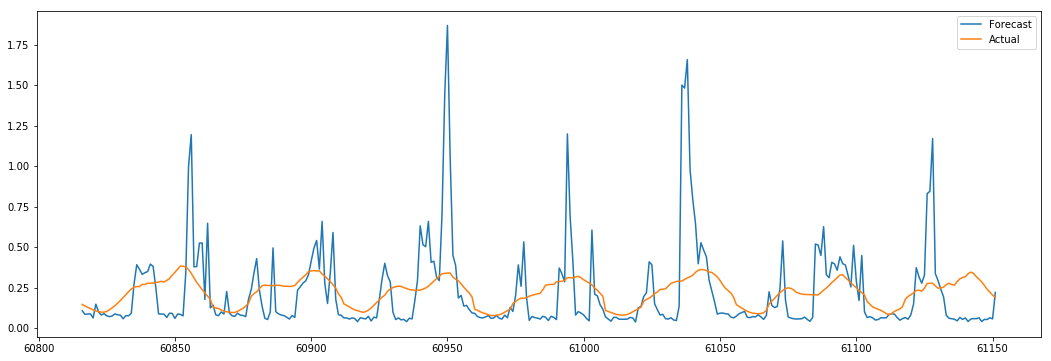

In [225]:
plt.figure(figsize=(18,6))
plt.plot(ts)
plt.plot(ys)
plt.legend(['Forecast','Actual'])
plt.show()

In [226]:
mac = 'MAC000100'

In [227]:
mac_df = df_rmse.loc[df_rmse['LCLid'] == mac]

In [228]:
ts = mac_df['energy(kWh/hh)']
ys = mac_df['y_pred']

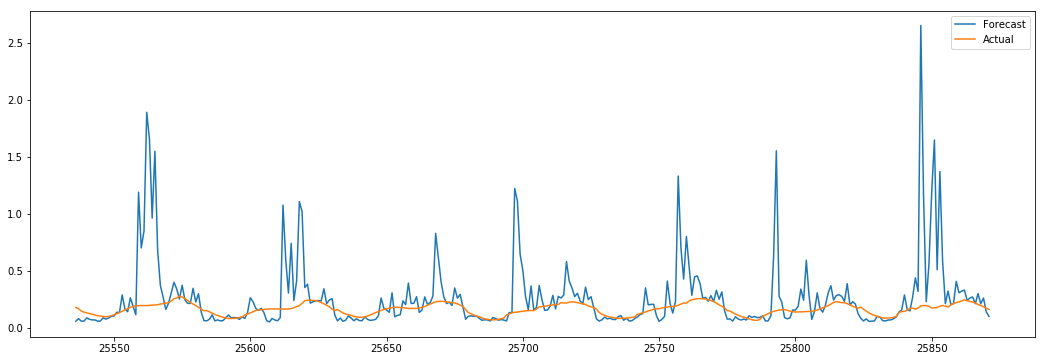

In [229]:
plt.figure(figsize=(18,6))
plt.plot(ts)
plt.plot(ys)
plt.legend(['Forecast','Actual'])
plt.show()

Plot map with minimum RMSE

In [252]:
abs_av = df_rmse.groupby(['LCLid']).mean().reset_index()

In [253]:
abs_av.head()

,LCLid,energy(kWh/hh),y_pred,abs_diff
0,MAC000006,0.070527,0.207168,0.140253
1,MAC000015,0.231104,0.214640,0.115876
2,MAC000017,0.132125,0.195126,0.097653
3,MAC000018,0.104574,0.296017,0.191443
4,MAC000019,0.171149,0.220626,0.106964


In [254]:
lowest_abs_diff = abs_av.iloc[abs_av['abs_diff'].argmin()]

/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


In [258]:
lowest_abs_diff['LCLid']

'MAC004550'

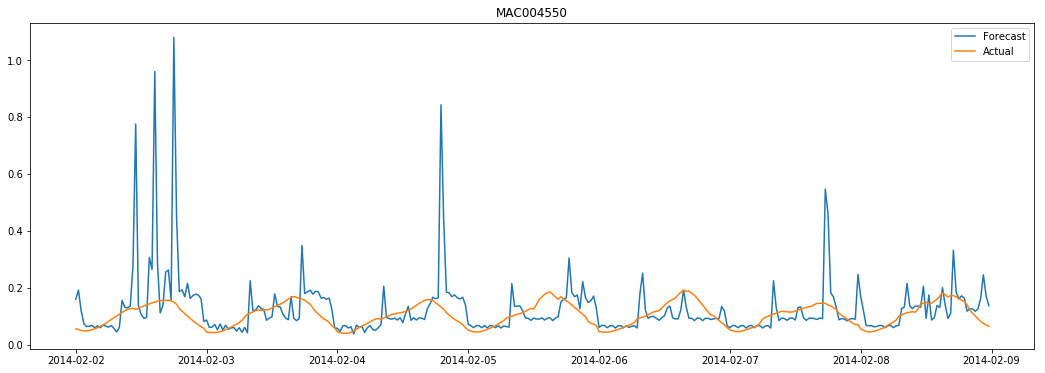

In [262]:
plot_mac(df_rmse, lowest_abs_diff['LCLid'])

In [263]:
#plot biggest absolute difference in actual/pred series
highest_abs_diff = abs_av.iloc[abs_av['abs_diff'].argmax()]

/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


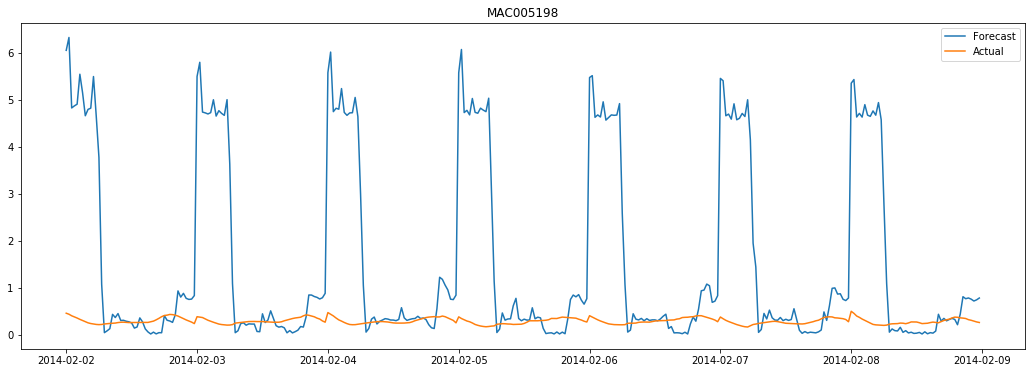

In [264]:
plot_mac(df_rmse, highest_abs_diff['LCLid'])

LightGBM data

In [265]:
lightgbm_df=pd.read_csv('{0}lightgbm/4_4_b_forecast_GB_hh_preds.csv'.format(PATH))

In [266]:
lightgbm_df.head()

,day_time,LCLid,y_pred
0,2014-02-02 00:30:00,MAC004952,0.225496
1,2014-02-02 00:30:00,MAC005002,0.196912
2,2014-02-02 00:30:00,MAC004902,1.918720
3,2014-02-02 00:30:00,MAC005044,0.414193
4,2014-02-02 00:30:00,MAC004485,0.128147


In [267]:
lightgbm_df['day_time'] = pd.to_datetime(lightgbm_df['day_time'], format='%Y-%m-%d %H:%M:%S')

In [268]:
lightgbm_df.sort_values(by=['LCLid', 'day_time'], inplace=True)

In [269]:
lightgbm_df = lightgbm_df.reset_index(drop=True)

In [288]:
mac_df = df_rmse.loc[df_rmse['LCLid'] == 'MAC000230']


In [289]:
y_df = lightgbm_df.loc[lightgbm_df['LCLid'] == 'MAC000230']

In [290]:
y_df = y_df.set_index("day_time")

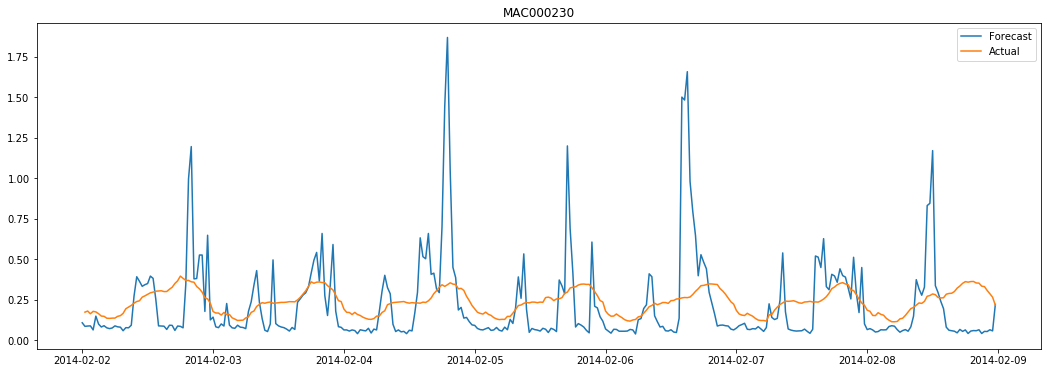

In [293]:
ts = mac_df['energy(kWh/hh)']
ys = y_df['y_pred']
plt.figure(figsize=(18,6))
plt.plot(ts)
plt.plot(ys)
plt.legend(['Forecast','Actual'])
plt.title('MAC000230')
plt.show()

In [294]:
mac_df = df_rmse.loc[df_rmse['LCLid'] == 'MAC000100']


In [295]:
y_df = lightgbm_df.loc[lightgbm_df['LCLid'] == 'MAC000100']

In [296]:
y_df = y_df.set_index("day_time")

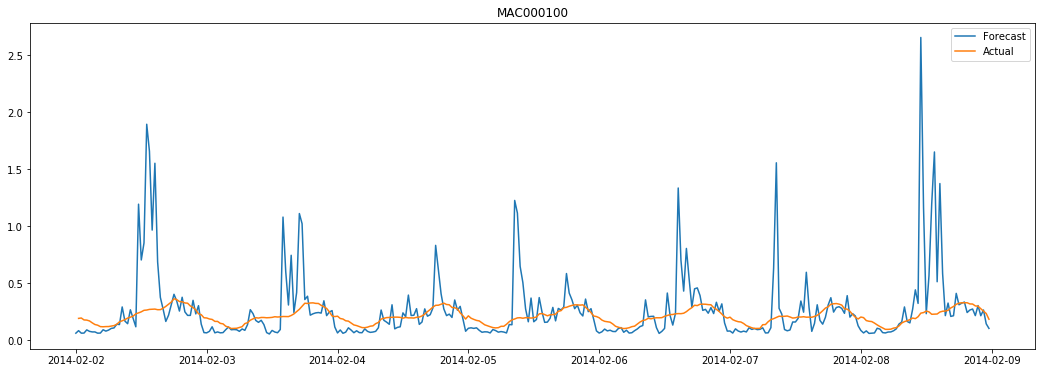

In [300]:
ts = mac_df['energy(kWh/hh)']
ys = y_df['y_pred']
plt.figure(figsize=(18,6))
plt.plot(ts)
plt.plot(ys)
plt.legend(['Forecast','Actual'])
plt.title('MAC000100')
plt.show()

'MAC004550'

In [301]:
mac_df = df_rmse.loc[df_rmse['LCLid'] == 'MAC004550']


In [302]:
y_df = lightgbm_df.loc[lightgbm_df['LCLid'] == 'MAC004550']

In [303]:
y_df = y_df.set_index("day_time")

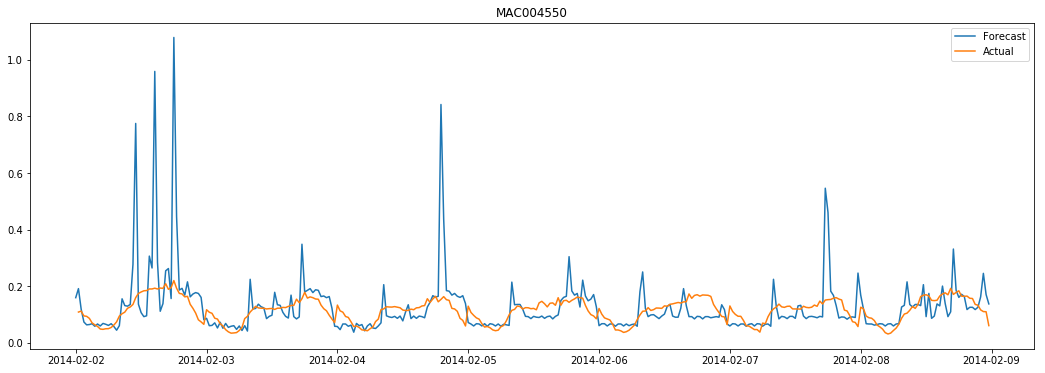

In [306]:
ts = mac_df['energy(kWh/hh)']
ys = y_df['y_pred']
plt.figure(figsize=(18,6))
plt.plot(ts)
plt.plot(ys)
plt.legend(['Forecast','Actual'])
plt.title('MAC004550')
plt.show()

MAC0005198 - worst pred for pytoch model

In [307]:
mac_df = df_rmse.loc[df_rmse['LCLid'] == 'MAC005198']


In [308]:
y_df = lightgbm_df.loc[lightgbm_df['LCLid'] == 'MAC005198']

In [309]:
y_df = y_df.set_index("day_time")

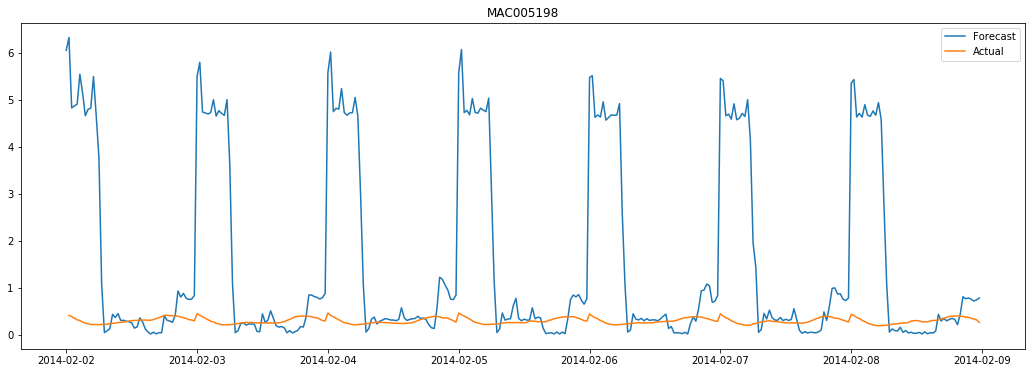

In [310]:
ts = mac_df['energy(kWh/hh)']
ys = y_df['y_pred']
plt.figure(figsize=(18,6))
plt.plot(ts)
plt.plot(ys)
plt.legend(['Forecast','Actual'])
plt.title('MAC005198')
plt.show()

Plot absolute differences between pytorch and lightgbm model predictions

In [311]:
lgmb_preds = lightgbm_df['y_pred']
pytorch_preds = df_rmse['y_pred']

In [312]:
abs_list=[]
for a, y in zip(pytorch_preds, lgmb_preds):
    abs_diff = abs(a-y)
    abs_list.append(abs_diff)

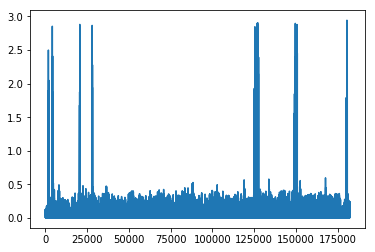

In [314]:
plt.plot(abs_list)

In [ ]:
Plot lightgbm absolute difference to actuals

In [315]:
actual = df_rmse['energy(kWh/hh)']

In [316]:
abs_list=[]
for a, y in zip(actual, lgmb_preds):
    abs_diff = abs(a-y)
    abs_list.append(abs_diff)

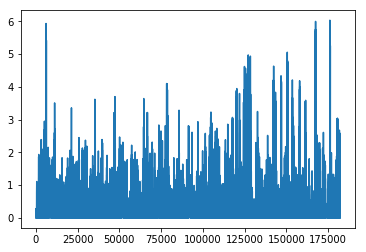

In [317]:
plt.plot(abs_list)

Plot pytorch absolute difference to actuals

In [318]:
abs_list=[]
for a, y in zip(actual, pytorch_preds):
    abs_diff = abs(a-y)
    abs_list.append(abs_diff)

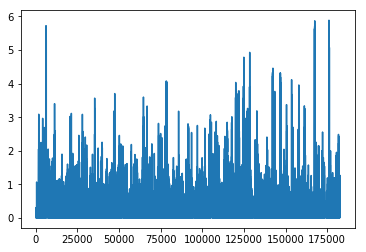

In [319]:
plt.plot(abs_list)